In [105]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.max_rows = 7
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

In [115]:
na_values = ['NO CLUE', 'N/A', '0']
requests = pd.read_csv(r'C:\Users\Lenovo\Downloads\311-service-requests.csv', na_values=na_values, dtype={'Incident Zip': str})

In [116]:
requests['Incident Zip'].unique()

array(['11432', '11378', '10032', '10023', '10027', '11372', '11419',
       '11417', '10011', '11225', '11218', '10003', '10029', '10466',
       '11219', '10025', '10310', '11236', nan, '10033', '11216', '10016',
       '10305', '10312', '10026', '10309', '10036', '11433', '11235',
       '11213', '11379', '11101', '10014', '11231', '11234', '10457',
       '10459', '10465', '11207', '10002', '10034', '11233', '10453',
       '10456', '10469', '11374', '11221', '11421', '11215', '10007',
       '10019', '11205', '11418', '11369', '11249', '10005', '10009',
       '11211', '11412', '10458', '11229', '10065', '10030', '11222',
       '10024', '10013', '11420', '11365', '10012', '11214', '11212',
       '10022', '11232', '11040', '11226', '10281', '11102', '11208',
       '10001', '10472', '11414', '11223', '10040', '11220', '11373',
       '11203', '11691', '11356', '10017', '10452', '10280', '11217',
       '10031', '11201', '11358', '10128', '11423', '10039', '10010',
       '11209',

In [118]:
na_values = ['NO CLUE', 'N/A', '0']
requests = pd.read_csv(r'C:\Users\Lenovo\Downloads\311-service-requests.csv', na_values=na_values, dtype={'Incident Zip': str})

In [119]:
rows_with_dashes = requests['Incident Zip'].str.contains('-').fillna(False)
len(requests[rows_with_dashes])

5

In [120]:
requests[rows_with_dashes]['Incident Zip']

29136    77092-2016
30939    55164-0737
70539    11549-3650
85821    29616-0759
89304    35209-3114
Name: Incident Zip, dtype: object

In [122]:
long_zip_codes = requests['Incident Zip'].str.len() > 5
requests['Incident Zip'] = requests['Incident Zip'].str.slice(0, 5)
requests['Incident Zip'][long_zip_codes].unique()

array(['77092', '55164', '00000', '11549', '29616', '35209'], dtype=object)

In [123]:
zero_zips = requests['Incident Zip'] == '00000'
requests.loc[zero_zips, 'Incident Zip'] = np.nan

In [124]:
unique_zips = requests['Incident Zip'].unique()
unique_zips

array(['11432', '11378', '10032', '10023', '10027', '11372', '11419',
       '11417', '10011', '11225', '11218', '10003', '10029', '10466',
       '11219', '10025', '10310', '11236', nan, '10033', '11216', '10016',
       '10305', '10312', '10026', '10309', '10036', '11433', '11235',
       '11213', '11379', '11101', '10014', '11231', '11234', '10457',
       '10459', '10465', '11207', '10002', '10034', '11233', '10453',
       '10456', '10469', '11374', '11221', '11421', '11215', '10007',
       '10019', '11205', '11418', '11369', '11249', '10005', '10009',
       '11211', '11412', '10458', '11229', '10065', '10030', '11222',
       '10024', '10013', '11420', '11365', '10012', '11214', '11212',
       '10022', '11232', '11040', '11226', '10281', '11102', '11208',
       '10001', '10472', '11414', '11223', '10040', '11220', '11373',
       '11203', '11691', '11356', '10017', '10452', '10280', '11217',
       '10031', '11201', '11358', '10128', '11423', '10039', '10010',
       '11209',

In [125]:
zips = requests['Incident Zip']
is_close = zips.str.startswith('0') | zips.str.startswith('1')
is_far = ~(is_close) & zips.notnull()

In [126]:
zips[is_far]

12102    77056
13450    70711
29136    77092
         ...  
85821    29616
89304    35209
94201    41042
Name: Incident Zip, Length: 13, dtype: object

In [127]:
requests[is_far][['Incident Zip', 'Descriptor', 'City']].sort_values('Incident Zip')

,Incident Zip,Descriptor,City
71834,23502,Harassment,NORFOLK
47048,23541,Harassment,NORFOLK
85821,29616,Debt Not Owed,GREENVILLE
...,...,...,...
44008,90010,Billing Dispute,LOS ANGELES
57636,92123,Harassment,SAN DIEGO
71001,92123,Billing Dispute,SAN DIEGO


<Axes: xlabel='City'>

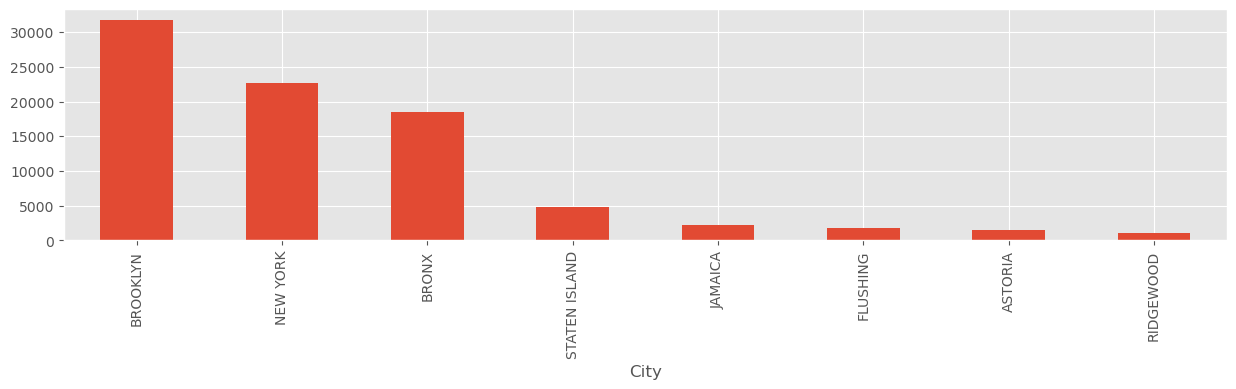

In [132]:
city_counts = requests['City'].str.upper().value_counts()
filtered_city_counts = city_counts[city_counts > 1000]
filtered_city_counts.plot(kind='bar')